In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv("train.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S
9,9,0,2,"Greigo, Rudy",male,66.00,0,0,6981,9.14,D2969,C


**Data quality assessment** 

Проверка на достоверность данных:
1. Значения в  столбце должны иметь определенный тип данных
2. Комбинация полей должны быть уникальными в наборе данных



In [8]:
#Значения атрибута "Класс билета" могут быть 1,2,3
data.Pclass.unique().tolist()

[1, 3, 2]

In [10]:
#Значение атрибута "Пол" может принимать значения "male" и "female"
data.Sex.unique().tolist()

['male', 'female']

In [12]:
#Значение атрибута "Спасшийся" может принимать значения 1 или 0, где 1 - выжил , 0 - умер
data.Survived.unique().tolist()

[1, 0]

In [18]:
#Возрастной диапазон пассажиров: наибольший и наименьший возраст
[data.Age.max(),data.Age.min()]

[87.0, 0.08]

**Вывод по достоверности данных**

Поля Sex, Pclass, Survived, Age допустимы и являются достоверными

**Data exploration**

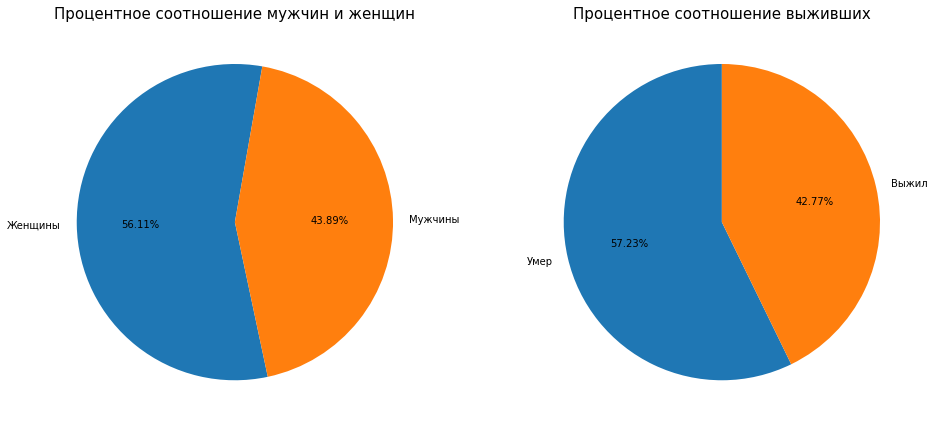

In [64]:
fig = plt.figure(figsize=(16, 16))
plt.subplot(2,2,1)
percent_gender = data['Sex'].value_counts()
plt.pie(x=percent_gender, labels=['Женщины', 'Мужчины'], autopct='%.2f%%',startangle=80)
plt.title("Процентное соотношение мужчин и женщин", fontsize=15)

plt.subplot(2,2,2)
percent_survived = data['Survived'].value_counts()
plt.pie(x=percent_survived, labels=['Умер', 'Выжил'], autopct='%.2f%%',startangle=90)
plt.title("Процентное соотношение выживших", fontsize=15)
plt.show()

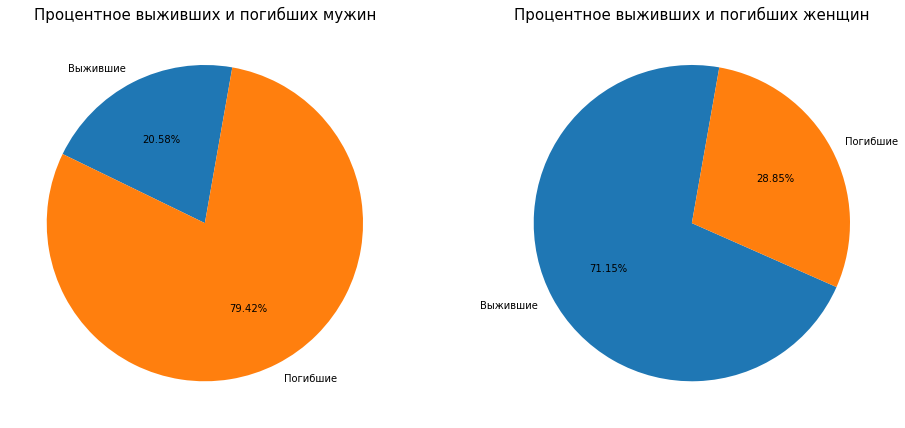

In [76]:
fig = plt.figure(figsize=(16, 16))
plt.subplot(2,2,1)
percent_alive_men = data[(data['Sex'] == 'male') & (data['Survived'] == 1)].shape[0]
percent_dead_men = data[(data['Sex'] == 'male') & (data['Survived'] == 0)].shape[0]
plt.pie(x=[percent_alive_men,percent_dead_men], labels=['Выжившие', 'Погибшие'],autopct='%.2f%%',startangle=80)
plt.title("Процентное выживших и погибших мужин", fontsize=15)

plt.subplot(2,2,2)
percent_alive_woman = data[(data['Sex'] == 'female') & (data['Survived'] == 1)].shape[0]
percent_dead_woman = data[(data['Sex'] == 'female') & (data['Survived'] == 0)].shape[0]
plt.pie(x=[percent_alive_woman,percent_dead_woman], labels=['Выжившие', 'Погибшие'],autopct='%.2f%%',startangle=80)
plt.title("Процентное выживших и погибших женщин", fontsize=15)
plt.show()

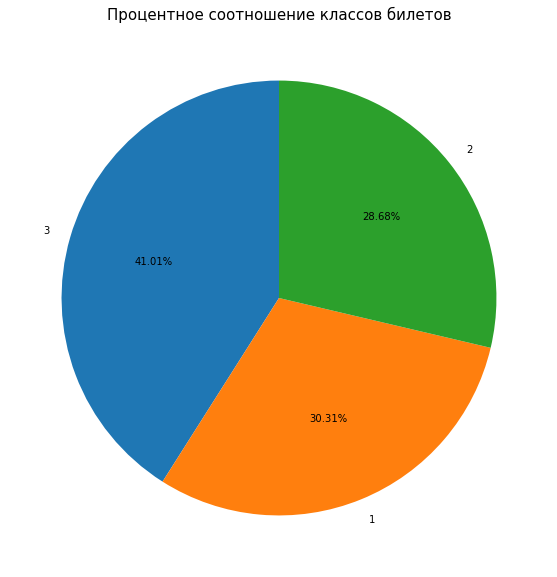

In [79]:
fig = plt.figure(figsize=(10, 10))
precent_pclass = data["Pclass"].value_counts()
plt.pie(x=precent_pclass,labels=precent_pclass.keys(), autopct="%.2f%%",startangle=90)
plt.title("Процентное соотношение классов билетов", fontsize=15)
plt.show()

**Анализ возрастов пассажиров**

In [92]:
statistic_age = data.Age.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Age,96708.0,38.355472,18.313556,0.08,25.0,39.0,53.0,87.0


Минимальный возраст - 0,8 

Максимальный возраст - 87

Средний возраст - 38